In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [3]:
data=pd.read_csv('clustering.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
data.shape()

TypeError: 'tuple' object is not callable

In [6]:
data.shape

(381, 13)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
X=data[['LoanAmount' , 'ApplicantIncome']]

In [10]:
#Visualize data points

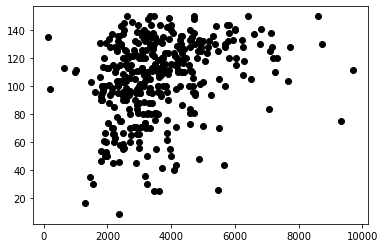

In [11]:
plt.scatter(X['ApplicantIncome'] , X['LoanAmount'], c='black')

<function matplotlib.pyplot.show(*args, **kw)>

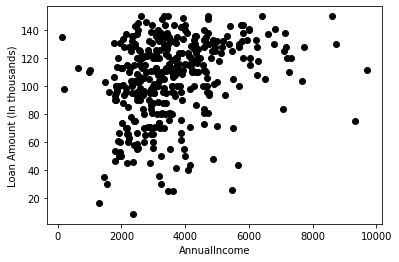

In [12]:
plt.scatter(X['ApplicantIncome'] , X['LoanAmount'], c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In thousands)')
plt.show

In [13]:
#Step1- Choose the no. of clusters(k) and select a random centroid for each cluster

In [16]:
#no. of clusters 
k=3
#select random observations as centroid

In [17]:
centroids=(X.sample(n=k))

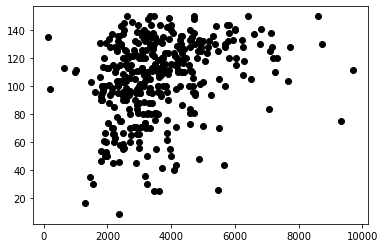

In [18]:
plt.scatter(X["ApplicantIncome"], X['LoanAmount'] , c='black')

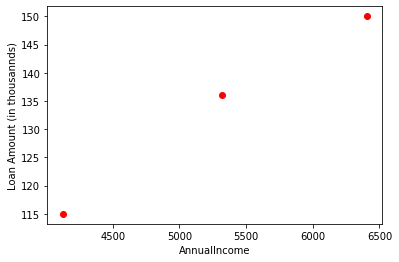

In [19]:
plt.scatter(centroids['ApplicantIncome'], centroids['LoanAmount'] , c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (in thousannds)')
plt.show()

In [20]:
#Step2: Assign all the points to the closest cluster centroid
#Step3: Recompute centroids of newly formed clusters

In [21]:
#Step4: repeat steps 2 and 3

In [31]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in centroids.iterrows():
        
        ED=[]
        for index2, row_d in XD.iterrows():
            
            d1=(row_c['ApplicantIncome']-row_d['ApplicantIncome'])**2
            d2=(row_c['LoanAmount']-row_d['LoanAmount'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
            
    C=[]
    for index, row in X.iterrows():
    
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+2]<min_dist:
                min_dist=row[i+2]
                pos=i+2
        c.append(pos)
    X['Cluster']=C
    centroids_new=X.groupby(['Cluster']).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff=((centroids_new['LoanAmount']-centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome']-centroids['ApplicantIncome']))
        print(diff.sum())
    centroids=X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]

        

C:\Users\Rita\anaconda3.x\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


KeyError: 4